## Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading-In Data

In [ ]:
df_rf_25 = pd.read_csv("../data/many_models_random_forest_025.csv")
df_rf_50 = pd.read_csv("../data/many_models_random_forest_050.csv")
df_rf_100 = pd.read_csv("../data/many_models_random_forest_100.csv")
df_rf_150 = pd.read_csv("../data/many_models_random_forest_150.csv")
df_rf_200 = pd.read_csv("../data/many_models_random_forest_200.csv")
df_rf = pd.concat([df_rf_25, df_rf_50, df_rf_100, df_rf_150, df_rf_200])
df_rf["max_features"] = df_rf["max_features"].fillna("1.0")

In [ ]:
df_random = pd.read_csv("../data/random_portfolio_200_securities_returns.csv")

## Hard Prediction vs Top 200

When using the same inferences, the top-200 strategy beats hard prediction strategy 99.3% percent of the time in terms of returns and 95.9% in terms of Sharpe.

In [ ]:
print("Return:", len(df_rf.query("top_200_ann_ret > hp_ann_ret")) / len(df_rf))
print("Sharpe:", len(df_rf.query("top_200_sharpe > hp_sharpe")) / len(df_rf))

Return: 0.9931972789115646
Sharpe: 0.9591836734693877


The average returns outperformance is about 588bps

In [ ]:
(df_rf["top_200_ann_ret"] - df_rf["hp_ann_ret"]).describe()

count    735.000000
mean       0.058836
std        0.021482
min       -0.028446
25%        0.046695
50%        0.062770
75%        0.074799
max        0.099717
dtype: float64

In [ ]:
(df_rf["top_200_sharpe"] - df_rf["hp_sharpe"]).describe()

count    735.000000
mean       0.164054
std        0.084732
min       -0.227054
25%        0.113803
50%        0.173897
75%        0.225384
max        0.350202
dtype: float64

## Exploring the Distributions of the Return of the Strategies

In [ ]:
df_1 = pd.DataFrame({
    "strategy":"top_200",
    "return":df_rf["top_200_ann_ret"]
})

df_2 = pd.DataFrame({
    "strategy":"hard_prediction",
    "return":df_rf["hp_ann_ret"]
})

df_3 = pd.DataFrame({
    "strategy":"random",
    "return":df_random["returns"]
})

df_returns_tidy = pd.concat([df_1, df_2, df_3])

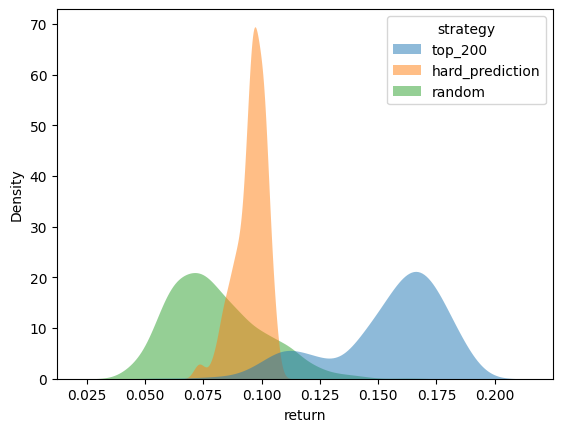

In [ ]:
sns.kdeplot(
   data=df_returns_tidy, x="return", hue="strategy",
   fill=True, common_norm=False, #palette="crest",
   alpha=.5, linewidth=0,
);

In [ ]:
pd.concat([
    df_random[["returns"]].describe(percentiles=[0.025, 0.10, 0.50, 0.90, 0.975]),
    df_rf[["hp_ann_ret","top_200_ann_ret"]].describe(percentiles=[0.025, 0.10, 0.50, 0.90, 0.975]) 
], axis=1)

,returns,hp_ann_ret,top_200_ann_ret
count,1000.000000,735.000000,735.000000
mean,0.080078,0.095323,0.154159
std,0.019941,0.006663,0.024619
min,0.036929,0.070798,0.053696
2.5%,0.048913,0.079439,0.098119
10%,0.057390,0.086032,0.112426
50%,0.076924,0.096507,0.160568
90%,0.109125,0.102586,0.179569
97.5%,0.123900,0.105188,0.187449
max,0.166622,0.108948,0.195525


## Regressing Fit Scores vs Portfolio Returns

### Accuracy

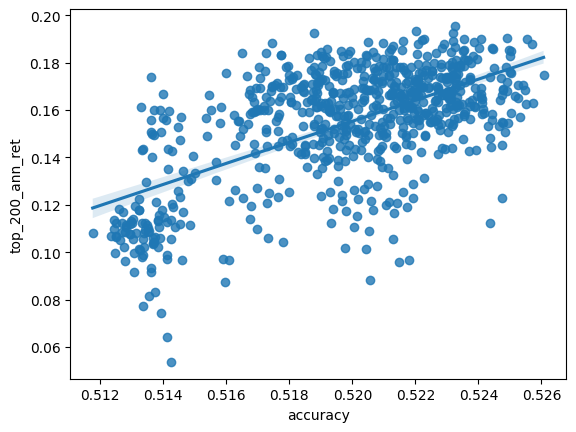

In [ ]:
sns.regplot(data=df_rf, x="accuracy", y="top_200_ann_ret");

In [ ]:
df_rf[["accuracy", "top_200_ann_ret"]].corr() ** 2

,accuracy,top_200_ann_ret
accuracy,1.000000,0.372724
top_200_ann_ret,0.372724,1.000000


### Precision

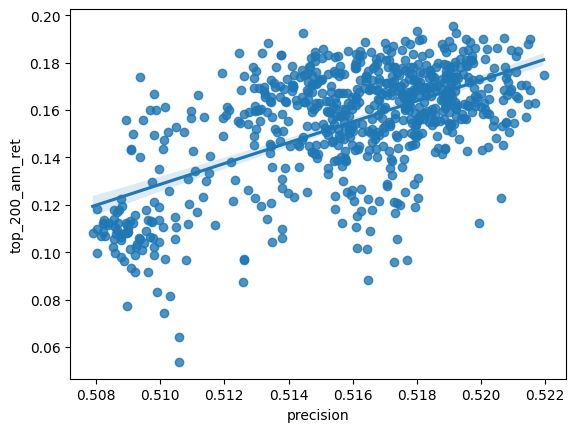

In [ ]:
sns.regplot(data=df_rf, x="precision", y="top_200_ann_ret");

In [ ]:
df_rf[["precision", "top_200_ann_ret"]].corr() ** 2

,precision,top_200_ann_ret
precision,1.000000,0.364989
top_200_ann_ret,0.364989,1.000000


### Recall

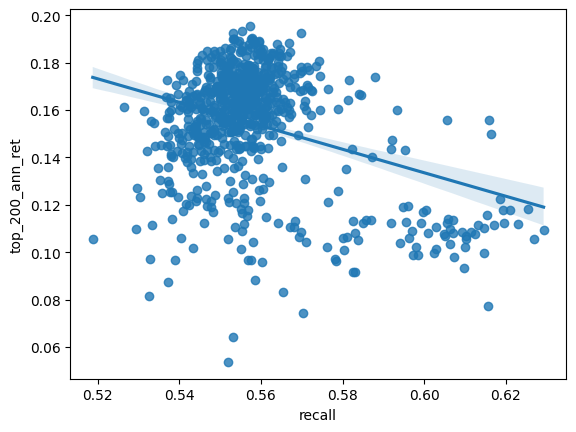

In [ ]:
sns.regplot(data=df_rf, x="recall", y="top_200_ann_ret");

In [ ]:
df_rf[["recall", "top_200_ann_ret"]].corr() ** 2

,recall,top_200_ann_ret
recall,1.000000,0.117306
top_200_ann_ret,0.117306,1.000000


### ROC-AUC

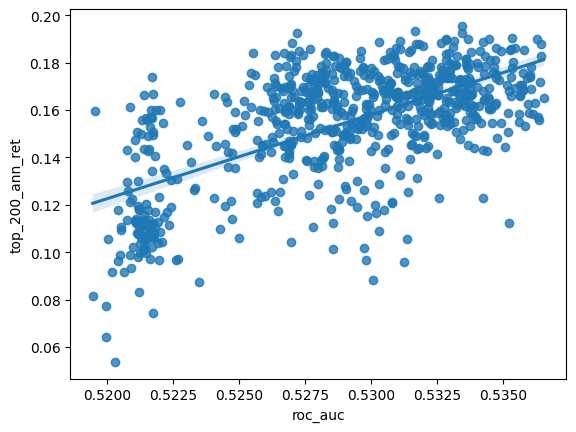

In [ ]:
sns.regplot(data=df_rf, x="roc_auc", y="top_200_ann_ret");

In [ ]:
df_rf[["roc_auc", "top_200_ann_ret"]].corr() ** 2

,roc_auc,top_200_ann_ret
roc_auc,1.000000,0.393517
top_200_ann_ret,0.393517,1.000000


## Average ROC-AUC by Hyperparameter

### `n_estimators`

In [ ]:
df_rf.groupby(["n_estimators"])[["roc_auc"]].mean()

,roc_auc
n_estimators,
25,0.526499
50,0.528380
100,0.529498
150,0.529898
200,0.530177


(0.52, 0.536)

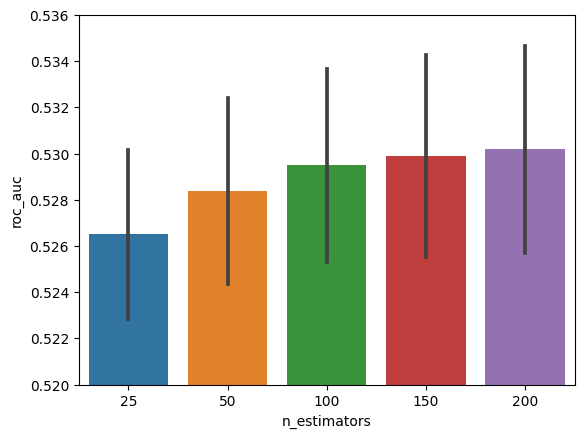

In [ ]:
fig, ax = plt.subplots()
sns.barplot(df_rf, x="n_estimators", y="roc_auc", errorbar="sd");
ax.set_ylim(0.52, 0.536)

### `criterion`

In [ ]:
df_rf.groupby(["criterion"])[["roc_auc"]].mean()

,roc_auc
criterion,
entropy,0.529023
gini,0.528578
log_loss,0.529071


(0.52, 0.534)

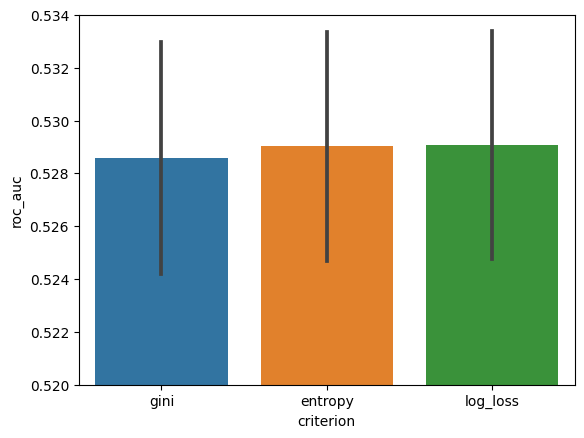

In [ ]:
fig, ax = plt.subplots()
sns.barplot(df_rf, x="criterion", y="roc_auc", errorbar="sd");
ax.set_ylim(0.52, 0.534)

### `max_depth`

In [ ]:
df_rf.groupby(["max_depth"])[["roc_auc"]].mean()

,roc_auc
max_depth,
2,0.521357
4,0.527509
6,0.531510
8,0.533253
10,0.532427
12,0.529779
14,0.526397


(0.52, 0.537)

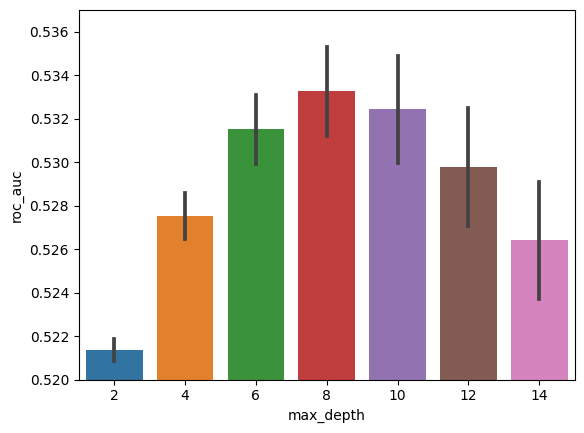

In [ ]:
fig, ax = plt.subplots()
sns.barplot(df_rf, x="max_depth", y="roc_auc", errorbar="sd");
ax.set_ylim(0.52, 0.537)

### `max_fetures`

In [ ]:
df_rf.groupby(["max_features"])[["roc_auc"]].mean()

,roc_auc
max_features,
0.1,0.528033
0.25,0.529141
0.5,0.529585
0.75,0.529837
1.0,0.530028
log2,0.527510
sqrt,0.528099


(0.52, 0.535)

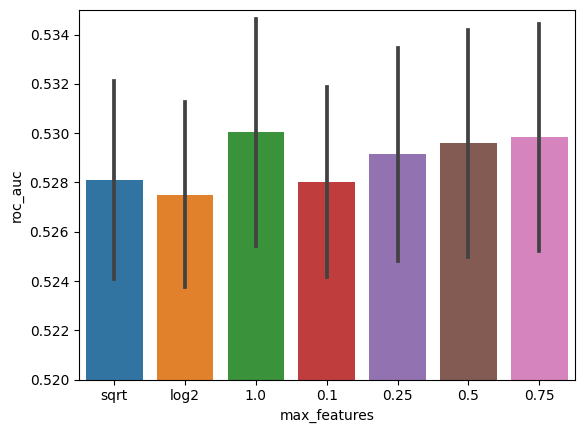

In [ ]:
fig, ax = plt.subplots()
sns.barplot(df_rf, x="max_features", y="roc_auc", errorbar="sd");
ax.set_ylim(0.52, 0.535)

## Hyperparameter Selection & Based On Averages

`n_estimators=200`

`criterion='log_loss'`

`max_depth=8`

`max_features=1.0`

In [ ]:
df_rf.query("n_estimators==200 & criterion=='log_loss' & max_depth==8 & max_features=='1.0'")

,model_family,model_name,n_estimators,criterion,max_depth,max_features,accuracy,precision,recall,roc_auc,hp_ann_ret,hp_sharpe,top_200_ann_ret,top_200_sharpe
121,random_forest,"RandomForestClassifier(criterion='log_loss', m...",200,log_loss,8,1.0,0.524734,0.520771,0.55226,0.535579,0.102752,0.72258,0.155066,0.840674


## Hyperparamater Selection based on Highest `roc_auc`

In [ ]:
df_rf.nlargest(1, "roc_auc")

,model_family,model_name,n_estimators,criterion,max_depth,max_features,accuracy,precision,recall,roc_auc,hp_ann_ret,hp_sharpe,top_200_ann_ret,top_200_sharpe
75,random_forest,"RandomForestClassifier(criterion='entropy', ma...",200,entropy,8,0.5,0.525264,0.521166,0.554871,0.536528,0.097519,0.691247,0.165013,0.883148


## Hyperparameters The Yield the Highest Highest Returns

In [ ]:
df_rf.nlargest(10, "top_200_ann_ret")

,model_family,model_name,n_estimators,criterion,max_depth,max_features,accuracy,precision,recall,roc_auc,hp_ann_ret,hp_sharpe,top_200_ann_ret,top_200_sharpe
69,random_forest,"RandomForestClassifier(criterion='entropy', ma...",200,entropy,6,0.75,0.523264,0.519136,0.557289,0.533424,0.095973,0.692821,0.195525,1.033880
116,random_forest,"RandomForestClassifier(criterion='log_loss', m...",100,log_loss,6,0.25,0.522016,0.518007,0.555298,0.531644,0.093743,0.679610,0.193460,0.987461
76,random_forest,"RandomForestClassifier(criterion='entropy', ma...",50,entropy,8,0.75,0.523193,0.519213,0.553226,0.533430,0.101079,0.718921,0.192609,1.029208
109,random_forest,"RandomForestClassifier(criterion='log_loss', m...",25,log_loss,4,0.25,0.518779,0.514436,0.569928,0.527188,0.095637,0.693899,0.192475,1.010076
123,random_forest,"RandomForestClassifier(criterion='log_loss', m...",150,log_loss,8,0.25,0.524910,0.520719,0.557797,0.535344,0.098456,0.701729,0.190395,0.989217
33,random_forest,"RandomForestClassifier(max_depth=10, max_featu...",100,gini,10,0.5,0.524072,0.520050,0.553236,0.534477,0.100996,0.710138,0.190202,0.989624
30,random_forest,"RandomForestClassifier(max_depth=10, max_featu...",200,gini,10,1.0,0.525552,0.521527,0.553317,0.536267,0.103884,0.726494,0.190177,0.991150
69,random_forest,"RandomForestClassifier(criterion='entropy', ma...",100,entropy,6,0.75,0.523537,0.519531,0.553510,0.533683,0.096698,0.696210,0.190063,0.986459
127,random_forest,"RandomForestClassifier(criterion='log_loss', m...",200,log_loss,10,log2,0.522264,0.518148,0.557615,0.532837,0.092723,0.667942,0.189810,0.999055
67,random_forest,"RandomForestClassifier(criterion='entropy', ma...",150,entropy,6,0.25,0.522223,0.518079,0.557990,0.532840,0.097570,0.697022,0.189765,0.978207


## OLD CODE

In [ ]:
#df_rf["top_200_ann_ret"].hist(bins=25)

In [ ]:
#df_rf.query("n_estimators==25")["top_200_ann_ret"].hist(bins=25)

In [ ]:
#df_rf.query("n_estimators==25")["top_200_ann_ret"].describe(percentiles=(0.025, 0.50, 0.975))

In [ ]:
#df_rf.query("n_estimators==50")["top_200_ann_ret"].hist(bins=20)

In [ ]:
#df_rf.query("n_estimators==50")["top_200_ann_ret"].describe(percentiles=(0.025, 0.50, 0.975))

In [ ]:
#df_rf.query("n_estimators==100")["top_200_ann_ret"].hist(bins=25)

In [ ]:
#df_rf.query("n_estimators==100")["top_200_ann_ret"].describe(percentiles=(0.025, 0.50, 0.975))

In [ ]:
#df_rf.groupby(["n_estimators"])[["top_200_ann_ret"]].mean()

In [ ]:
#df_rf.groupby(["criterion"])[["top_200_ann_ret"]].mean()

In [ ]:
#df_rf.groupby(["max_depth"])[["top_200_ann_ret"]].mean().reset_index().plot(x="max_depth", y="top_200_ann_ret", kind)

In [ ]:
#df_rf.groupby(["max_depth"])[["top_200_ann_ret"]].mean().reset_index().plot(x="max_depth", y="top_200_ann_ret", kind="bar")

In [ ]:
#sns.barplot(df_rf, x="max_depth", y="top_200_ann_ret", errorbar="sd");

In [ ]:
#sns.barplot(df_rf, x="max_features", y="top_200_ann_ret", errorbar="sd");

In [ ]:
#sns.regplot(data=df_rf, x="roc_auc", y="top_200_ann_ret");

In [ ]:
#df_rf[["roc_auc", "hp_ann_ret"]].corr() ** 2

In [ ]:
#sns.regplot(data=df_rf, x="hp_ann_ret", y="top_200_ann_ret")

In [ ]:
#df_rf.sort_values("top_200_ann_ret", ascending=False).head(100)

In [ ]:
#df_rf.query("n_estimators==150 & criterion=='entropy' & max_depth==8 & max_features=='sqrt'")

In [ ]:
#df_rf.groupby(["max_depth"])[["top_200_ann_ret"]].agg([np.mean, np.std, np.min, np.max]).reset_index()